<a href="https://colab.research.google.com/github/zia207/High_Performance_Computing_Python/blob/main/Notebook/01_06_01_hpc_big_data_import_export_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# Data Import and Export in Python with HPC

When working with large and complex datasets in Python, efficient data import and export methods are essential. Large datasets can overwhelm basic tools, causing slow and inefficient processes. Using optimized libraries and high-performance computing (HPC) strategies ensures quick, reliable, and scalable data analysis. This tutorial covers Python libraries like pandas, pyarrow, fastparquet, and dask, which are built for managing big data efficiently, especially in HPC environments. We'll use the NYC Yellow Taxi Trip Data 2023 as a case study.

## Key Tools and Libraries in Python

Python offers several libraries for big data import/export, optimized for performance and scalability:

-   **pandas**: A powerful library for data manipulation, with efficient CSV and Parquet file handling via read_csv and to_csv.
-   **pyarrow**: Provides an interface to Apache Arrow, enabling efficient columnar data processing with support for Parquet and Feather formats.
-   **fastparquet**: A lightweight library for reading and writing Parquet files, optimized for speed and memory efficiency.
-   **dask**: Enables parallel and distributed computing for large datasets, handling data that exceeds memory by processing in chunks.
-   **SQLAlchemy** with **psycopg2**/**pymysql**: Facilitates interaction with SQL databases, allowing efficient querying of large datasets.
-   **dask.distributed**: Integrates with distributed systems like HPC clusters or cloud storage for scalable data processing.
- **datatable**: As the name suggests, the package is closely related to R's `data.table` and attempts to mimic its core algorithms and API. It is close in spirit to `pandas` or `SFrame`; however we put specific emphasis on speed and big data support
- **feather-format**: Simple wrapper library to the `Apache Arrow-based` `Feather` File Format

## Challenges and Considerations

Handling big data in Python presents challenges like memory constraints, processing speed, and data format compatibility. Key considerations include:

-   **Memory Management**: Utilize libraries such as dask or pyarrow to process data in chunks or offload computation to distributed systems.
-   **File Formats**: Prefer columnar formats, such as Parquet or Feather, for compression and faster I/O compared to CSV.
-   **Parallel Processing**: Leverage HPC clusters or dask for parallelized data operations.
-   **Scalability**: Integrate with distributed frameworks (e.g., Dask on HPC) to handle datasets exceeding local memory.

## Challenges and Considerations

Handling big data in Python presents challenges like memory constraints, processing speed, and data format compatibility. Key considerations include:

-   **Memory Management**: Utilize libraries such as dask or pyarrow to process data in chunks or offload computation to distributed systems.
-   **File Formats**: Prefer columnar formats, such as Parquet or Feather, for compression and faster I/O compared to CSV.
-   **Parallel Processing**: Leverage HPC clusters or dask for parallelized data operations.
-   **Scalability**: Integrate with distributed frameworks (e.g., Dask on HPC) to handle datasets exceeding local memory.

## Best Practices

To optimize big data workflows in Python:

1.  Use memory-efficient libraries like pyarrow or dask for file operations.
2.  Prefer columnar formats like Parquet to reduce I/O bottlenecks.
3.  Query only necessary data from databases to minimize memory usage.
4.  Profile and benchmark I/O operations to identify performance bottlenecks.
5.  Utilize HPC clusters or cloud-based systems for massive datasets.


## Check and Install Required Python Packages

In [ ]:
import pkg_resources
import subprocess
import sys

# List of required packages
packages = [
    'pandas',
    'pyarrow',
    'fastparquet',
    'dask',
    'dask[distributed]',
    'sqlalchemy',
    'psycopg2-binary',
    'datatable',
    'feather-format'
]

# Check for missing packages and install them
for package in packages:
    try:
        pkg_resources.get_distribution(package)
    except pkg_resources.DistributionNotFound:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Verify installed packages
for package in packages:
    try:
        pkg_resources.get_distribution(package)
        print(f"{package} is installed.")
    except pkg_resources.DistributionNotFound:
        print(f"{package} failed to install.")

/tmp/ipython-input-3325339338.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


pandas is installed.
pyarrow is installed.
fastparquet is installed.
dask is installed.
dask[distributed] is installed.
sqlalchemy is installed.
psycopg2-binary is installed.
datatable is installed.
feather-format is installed.


## Data

The **NYC Yellow Taxi Trip Data 2023** is a large dataset (\~30–40 million records) from the New York City Taxi and Limousine Commission (TLC). It contains 12 monthly Parquet files (yellow_tripdata_2023-01.parquet to yellow_tripdata_2023-12.parquet), with columns like VendorID, tpep_pickup_datetime, passenger_count, trip_distance, fare_amount, etc. Available at NYC TLC, this dataset is ideal for urban mobility analysis and big data processing.


### Dataset Overview

The yellow_tripdata_2023-01.parquet file includes:

-   **VendorID**: Integer code for the technology provider.
-   **tpep_pickup_datetime**: Datetime of trip start.
-   **passenger_count**: Integer number of passengers.
-   **trip_distance**: Float distance in miles.
-   **fare_amount**: Float base fare.
-   **total_amount**: Float total charged.


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download Monthly Data Files

In [ ]:
import os
import urllib.request

# Base URL for TLC data
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/"
# Directory to save files (update with your local path)
save_dir = "/content/drive/MyDrive/Data/CSV_files/"
os.makedirs(save_dir, exist_ok=True)

# Download each month's file
for month in range(1, 13):
    file_name = f"yellow_tripdata_2023-{month:02d}.parquet"
    url = base_url + file_name
    dest_file = os.path.join(save_dir, file_name)

    if not os.path.exists(dest_file):
        print(f"Downloading {file_name}...")
        urllib.request.urlretrieve(url, dest_file)
    else:
        print(f"{file_name} already exists, skipping download.")

## Combine Monthly Files into a Single Parquet File

In [ ]:
import pyarrow.parquet as pq
import pyarrow as pa
import glob
import pandas as pd

# Directory containing monthly Parquet files
save_dir = "/content/drive/MyDrive/Data/CSV_files/"
file_paths = glob.glob(f"{save_dir}/yellow_tripdata_2023-*.parquet")

# Verify all 12 files exist
if len(file_paths) != 12:
    raise ValueError(f"Expected 12 Parquet files, found {len(file_paths)}.")

# Read each Parquet file into a pandas DataFrame
dfs = [pd.read_parquet(file) for file in file_paths]

# Concatenate the DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Combine into a single Parquet file
output_file = os.path.join(save_dir, "yellow_tripdata_2023.parquet")
combined_df.to_parquet(output_file, index=False)


print(f"Combined file saved to: {output_file}")

## Load Data

For this tutorial, we'll use only the January dataset `(yellow_tripdata_2023-01.parquet`).

In [ ]:
import pandas as pd

# Define data folder
data_folder = "/content/drive/MyDrive/Data/CSV_files/"

# Read January data with pandas
df = pd.read_parquet(f"{data_folder}yellow_tripdata_2023-01.parquet")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## pandas

The pandas library is a cornerstone of data analysis in Python, offering a high-performance DataFrame object for data manipulation. It supports efficient reading and writing of large datasets in formats like CSV and Parquet.

Reading/Writing CSV with pandas

The read_csv function is optimized for large datasets, with options to specify chunks, dtypes, and columns to reduce memory usage.



In [ ]:
# Read Parquet
df_pandas = pd.read_parquet(f"{data_folder}yellow_tripdata_2023-01.parquet")
print(df_pandas.info())

# Write CSV
df_pandas.to_csv(f"{data_folder}yellow_trip_data_2023_01_pandas.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## datatable

The `datatable` package is a high-performance Python library designed for efficient data manipulation and analysis, particularly for large datasets. It provides a Frame object, similar to a pandas DataFrame, but is optimized for speed and memory efficiency, leveraging multi-threaded operations and a columnar data structure. Built on top of C++ for performance, `datatable` excels in tasks like reading/writing large CSV files, filtering, grouping, and joining data, making it a powerful alternative to pandas for big data workflows.

### Rading a large CSV file

In [ ]:
import time
import pandas as pd
from datatable import dt, fread

# Define the data folder and file path
file_path = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"
df_dt = fread(file_path)
df_dt.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,…,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,2,2023-01-01T00:32:10,2023-01-01T00:40:36,1,0.97,1,N,161,141,2,…,0,1,14.3,2.5,0
1,2,2023-01-01T00:55:08,2023-01-01T01:01:27,1,1.1,1,N,43,237,1,…,0,1,16.9,2.5,0
2,2,2023-01-01T00:25:04,2023-01-01T00:37:49,1,2.51,1,N,48,238,1,…,0,1,34.9,2.5,0
3,1,2023-01-01T00:03:48,2023-01-01T00:13:25,0,1.9,1,N,138,7,1,…,0,1,20.85,0,1.25
4,2,2023-01-01T00:10:29,2023-01-01T00:21:19,1,1.43,1,N,107,79,1,…,0,1,19.68,2.5,0
5,2,2023-01-01T00:50:34,2023-01-01T01:02:52,1,1.84,1,N,161,137,1,…,0,1,27.8,2.5,0
6,2,2023-01-01T00:09:22,2023-01-01T00:19:49,1,1.66,1,N,239,143,1,…,0,1,20.52,2.5,0
7,2,2023-01-01T00:27:12,2023-01-01T00:49:56,1,11.7,1,N,142,200,1,…,3,1,64.44,2.5,0
8,2,2023-01-01T00:21:44,2023-01-01T00:36:40,1,2.95,1,N,164,236,1,…,0,1,28.38,2.5,0


### Reding time

In [ ]:
import time
import pandas as pd
from datatable import dt, fread

# Define the data folder and file path

file_path = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"

# Measure reading time with datatable
start_time = time.time()
df_dt = fread(file_path)
dt_time = time.time() - start_time

# Measure reading time with pandas
start_time = time.time()
df_pandas = pd.read_csv(file_path)
pandas_time = time.time() - start_time

# Create a DataFrame to display reading times
results = pd.DataFrame({
    'Method': ['datatable.fread', 'pandas.read_csv'],
    'Time_Seconds': [dt_time, pandas_time]
})

print(results)

/tmp/ipython-input-1371003229.py:16: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas = pd.read_csv(file_path)


            Method  Time_Seconds
0  datatable.fread      2.155667
1  pandas.read_csv     11.407602


### Write CSV file

In [ ]:
import time
import pandas as pd
from datatable import dt, fread

# Define the data folder and file paths

input_file = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"
output_file_dt = f"{data_folder}yellow_trip_data_2023_01_datatable.csv"
output_file_pandas = f"{data_folder}yellow_trip_data_2023_01_pandas_output.csv"

# Read the input CSV file to ensure consistent data
df_dt = fread(input_file)
df_pandas = pd.read_csv(input_file)

# Measure writing time with datatable
start_time = time.time()
df_dt.to_csv(output_file_dt)
dt_time = time.time() - start_time

# Measure writing time with pandas
start_time = time.time()
df_pandas.to_csv(output_file_pandas, index=False)
pandas_time = time.time() - start_time

# Create a DataFrame to display writing times
results = pd.DataFrame({
    'Method': ['datatable.to_csv', 'pandas.to_csv'],
    'Time_Seconds': [dt_time, pandas_time]
})

print(results)

/tmp/ipython-input-1090562177.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas = pd.read_csv(input_file)


## pyarrow

The `pyarrow` package is the Python interface to Apache Arrow, a cross-language, high-performance framework for in-memory and larger-than-memory data processing. It provides a columnar data format optimized for analytical tasks, supporting formats like Parquet and Feather for efficient storage and I/O. pyarrow enables fast data interchange between Python and other languages (e.g., R, Julia), with features like zero-copy access, parallel processing, and integration with pandas and Dask. It’s ideal for big data workflows, offering speed and scalability in high-performance computing (HPC) environments.

### Creating an Arrow Table

In [ ]:
import pyarrow as pa

# Create an Arrow Table
dat = pa.Table.from_pandas(pd.DataFrame({
    'x': [1, 2, 3, 4],
    'y': ['a', 'b', 'c', 'd']
}))
print(dat)

pyarrow.Table
x: int64
y: string
----
x: [[1,2,3,4]]
y: [["a","b","c","d"]]


### Converting DataFrame to Arrow Table

In [ ]:
# import time
import pandas as pd
from datatable import dt, fread
import pyarrow as pa
import pyarrow.parquet as pq
import glob

# Define the data folder and file path

file_path = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"
df_dt = fread(file_path)

# Convert datatable Frame to pandas DataFrame
df_pandas_from_dt = df_dt.to_pandas()

# Convert pandas DataFrame to Arrow Table
# arrow_table = pa.Table.from_pandas(df)
arrow_table = pa.Table.from_pandas(df_pandas_from_dt)
print(arrow_table.shape)

(3066766, 19)


### Reading  with pyarrow

In [ ]:
# Read Parquet as pandas dataframe
df_arrow = pq.read_table(f"{data_folder}yellow_tripdata_2023-01.parquet").to_pandas()
print(df_arrow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

### Write as paraquet

In [ ]:
# Write to Parquet
# Convert pandas DataFrame to Arrow Table
arrow_table_to_write = pa.Table.from_pandas(df_arrow)
pq.write_table(arrow_table_to_write, f"{data_folder}yellow_tripdata_2023_01_arrow.parquet")

## fastparquet

The `fastparquet` package is a lightweight Python library designed for reading and writing Parquet files, a columnar storage format optimized for big data processing. It provides a fast and memory-efficient interface for handling large datasets, with support for advanced features like compression (e.g., Snappy, Gzip), partitioning, and filtering. fastparquet is compatible with pandas and integrates well with other Python data tools, making it ideal for high-performance computing (HPC) environments where efficient I/O and scalability are critical. While similar to `pyarrow`, `fastparquet` focuses specifically on Parquet files, offering a simpler API for this format.

Although fastparquet is primarily designed for Parquet files, you can use it in conjunction with pandas to handle workflows involving CSV files, such as the yellow_tripdata_2023_01_pandas.csv file, by first converting to/from Parquet. Below are examples demonstrating how to read a CSV file into a pandas DataFrame, convert it to Parquet using fastparquet, and write it back as a Parquet file.

### Reading CSV file

In [ ]:
import pandas as pd
from fastparquet import write

# Define the data folder and file paths
csv_file = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"
parquet_file = f"{data_folder}yellow_trip_data_2023_01_fastparquet.parquet"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Write the DataFrame to a Parquet file using fastparquet
write(parquet_file, df)

print(f"Parquet file written to: {parquet_file}")

/tmp/ipython-input-1040084917.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Parquet file written to: /content/drive/MyDrive/Data/CSV_files/yellow_trip_data_2023_01_fastparquet.parquet


### Reading parquet file

In [ ]:
from fastparquet import write, ParquetFile

# Read Parquet
df_fastparquet = ParquetFile(f"{data_folder}yellow_tripdata_2023-01.parquet").to_pandas()
print(df_fastparquet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## dask

The `dask` package is a flexible Python library designed for parallel and distributed computing, enabling efficient handling of large datasets that exceed memory limits. It provides a pandas-like DataFrame interface and array operations similar to NumPy, but processes data in chunks using lazy evaluation and parallel execution. dask integrates seamlessly with HPC clusters, cloud systems, and libraries like pandas, pyarrow, and fastparquet, making it ideal for scalable big data workflows. It supports various file formats (e.g., CSV, Parquet) and is optimized for tasks like data import/export, filtering, and aggregations in high-performance computing (HPC) environments.

### Reading and Writing CSV Files with dask

In [ ]:
import dask.dataframe as dd

# Define the data folder and file path
file_path = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"

# Read the CSV file into a Dask DataFrame
ddf = dd.read_csv(file_path)

# Display basic information (computed to pandas for display)
print(ddf.compute().info())
print(f"Shape: {ddf.compute().shape}")
print(ddf.columns)  # Column names

/usr/local/lib/python3.12/dist-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 3066766 entries, 0 to 619970
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   string 
 2   tpep_dropoff_datetime  string 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     string 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), string(3)
memory usage: 582.0 MB
None


/usr/local/lib/python3.12/dist-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Shape: (3066766, 19)
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


### Writing a CSV File
The `to_csv` method in datatable allows writing a Frame to a CSV file, optimized for speed and memory efficiency.

In [ ]:
import dask.dataframe as dd

# Define the data folder and file paths
input_file = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"
output_file = f"{data_folder}yellow_trip_data_2023_01_dask.csv"

# Read the CSV file into a Dask DataFrame
ddf = dd.read_csv(input_file)

# Write the Dask DataFrame to a CSV file
ddf.to_csv(output_file, single_file=True, index=False)

print(f"CSV file written to: {output_file}")

/usr/local/lib/python3.12/dist-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


CSV file written to: /content/drive/MyDrive/Data/CSV_files/yellow_trip_data_2023_01_dask.csv


In [ ]:
# Write to Parquet
ddf.to_parquet(f"{data_folder}yellow_tripdata_2023_01_dask.parquet")

/usr/local/lib/python3.12/dist-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


## Comparison

We compare file formats (CSV, Parquet, Feather) and libraries (pandas, pyarrow, fastparquet, dask) for file size, reading, and writing times using the January dataset.




### File Size

In [ ]:
import os

# Calculate file sizes in KB
file_sizes = pd.DataFrame({
    'Format': ['CSV', 'Parquet (pyarrow)', 'Parquet (fastparquet)', 'Parquet (dask)'],
    'Size_KB': [
        os.path.getsize(f"{data_folder}yellow_trip_data_2023_01_pandas.csv") / 1000,
        os.path.getsize(f"{data_folder}yellow_tripdata_2023_01_arrow.parquet") / 1000,
        os.path.getsize(f"{data_folder}yellow_tripdata_2023_01_fastparquet.parquet") / 1000,
        os.path.getsize(f"{data_folder}yellow_tripdata_2023_01_dask.parquet") / 1000
    ]
})
print(file_sizes)

                  Format     Size_KB
0                    CSV  321956.581
1      Parquet (pyarrow)   63108.432
2  Parquet (fastparquet)  456216.161
3         Parquet (dask)       4.096


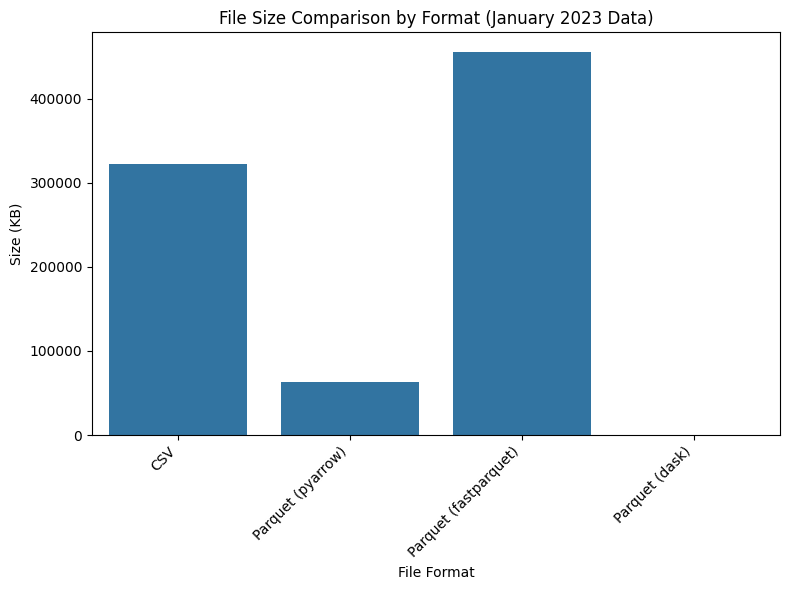

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of file sizes
plt.figure(figsize=(8, 6))
sns.barplot(x='Format', y='Size_KB', data=file_sizes)
plt.title('File Size Comparison by Format (January 2023 Data)')
plt.xlabel('File Format')
plt.ylabel('Size (KB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar plot visually represents the file sizes of the January 2023 taxi trip data when stored in different formats and processed with different libraries.

Here's what the plot shows:

-   **CSV is the largest:** The bar for the CSV format is the tallest, indicating that the CSV file is the largest in terms of size. This is typical for CSV files, as they store data in a plain text, row-based format without significant compression.

-   **Parquet is smaller (generally):** The bars for the Parquet files are generally shorter than the CSV bar. This demonstrates the effectiveness of the Parquet format in reducing file size through columnar storage and compression.

-   **Differences among Parquet implementations:** There are variations in the size of the Parquet files created by different libraries (`pyarrow`, `fastparquet`, and `dask`).

    -   `pyarrow` created the smallest Parquet file in this comparison.

    -   `fastparquet` created a Parquet file that appears even larger than the CSV file in this specific instance. This might be due to the specific compression settings used or other factors in how `fastparquet` saved this particular file. It's worth noting that while Parquet is generally smaller than CSV, the exact size can vary depending on the library, data types, and compression level.

    -   The `dask` Parquet file is extremely small. As I mentioned before, this is likely not the full dataset but rather a metadata file that dask uses to represent the larger dataset, which is processed in chunks.




### Reading Time - parqute file

In [ ]:
import time

# Measure reading times
pandas_time = time.time()
pd.read_parquet(f"{data_folder}yellow_tripdata_2023-01.parquet")
csv_time = time.time() - pandas_time

arrow_time = time.time()
pq.read_table(f"{data_folder}yellow_tripdata_2023-01.parquet").to_pandas()
arrow_time = time.time() - arrow_time

fastparquet_time = time.time()
ParquetFile(f"{data_folder}yellow_tripdata_2023-01.parquet").to_pandas()
fastparquet_time = time.time() - fastparquet_time

dask_time = time.time()
dd.read_parquet(f"{data_folder}yellow_tripdata_2023-01.parquet").compute()
dask_time = time.time() - dask_time

# Create DataFrame with reading times
reading_times = pd.DataFrame({
    'Method': ['pandas', 'pyarrow', 'fastparquet', 'dask'],
    'Time_Seconds': [pandas_time, arrow_time, fastparquet_time, dask_time]
})
print(reading_times)

        Method  Time_Seconds
0       pandas  1.758837e+09
1      pyarrow  1.259705e+00
2  fastparquet  1.715049e+00
3         dask  2.360731e+00


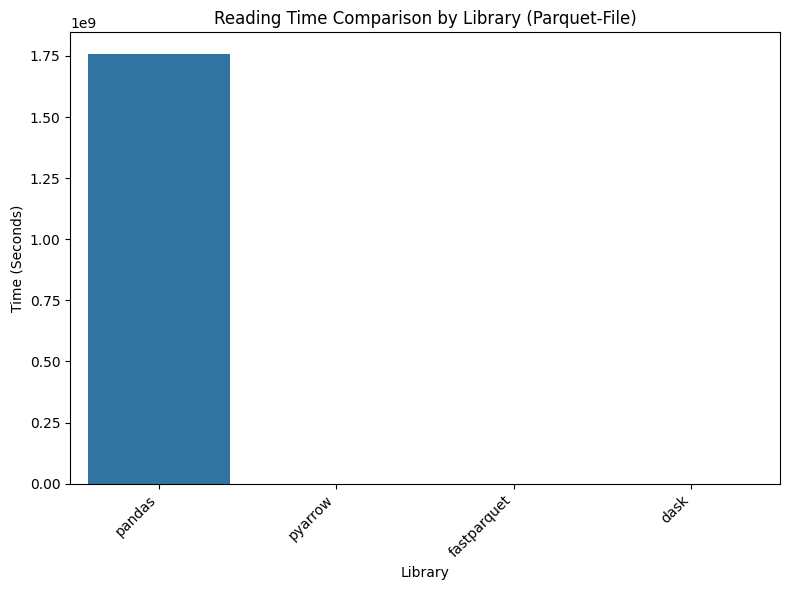

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of reading times
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Time_Seconds', data=reading_times)
plt.title('Reading Time Comparison by Library (Parquet-File)')
plt.xlabel('Library')
plt.ylabel('Time (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 ### Reading Time - CSV file

In [ ]:
import time
import pandas as pd
from datatable import fread
import dask.dataframe as dd

# Define the data folder and CSV file path
data_folder = "/content/drive/MyDrive/Data/CSV_files/"
csv_file = f"{data_folder}yellow_trip_data_2023_01_pandas.csv"


# Measure reading time with pandas
start_time = time.time()
df_pandas_csv = pd.read_csv(csv_file)
pandas_csv_time = time.time() - start_time

# Measure reading time with datatable
start_time = time.time()
df_dt_csv = fread(csv_file)
dt_csv_time = time.time() - start_time

# Measure reading time with dask
start_time = time.time()
ddf_csv = dd.read_csv(csv_file).compute() # .compute() to trigger reading
dask_csv_time = time.time() - start_time


# Create DataFrame with reading times
reading_times_csv = pd.DataFrame({
    'Method': ['pandas', 'datatable', 'dask'],
    'Time_Seconds': [pandas_csv_time, dt_csv_time, dask_csv_time]
})
print(reading_times_csv)

/tmp/ipython-input-1652114573.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas_csv = pd.read_csv(csv_file)
/usr/local/lib/python3.12/dist-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


      Method  Time_Seconds
0     pandas     11.869907
1  datatable      2.129029
2       dask     11.623873


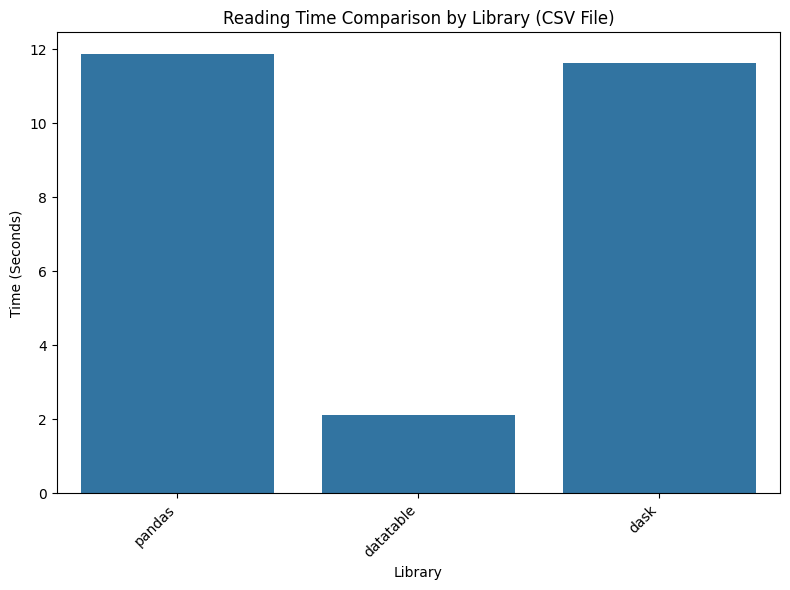

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of reading times
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Time_Seconds', data=reading_times_csv)
plt.title('Reading Time Comparison by Library (CSV File)')
plt.xlabel('Library')
plt.ylabel('Time (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Writing time

In [ ]:
# Measure writing times
csv_time = time.time()
df.to_csv(f"{data_folder}yellow_trip_data_2023_01_pandas.csv", index=False)
csv_time = time.time() - csv_time

arrow_time = time.time()
pq.write_table(arrow_table, f"{data_folder}yellow_tripdata_2023_01_arrow.parquet")
arrow_time = time.time() - arrow_time

fastparquet_time = time.time()
write(f"{data_folder}yellow_tripdata_2023_01_fastparquet.parquet", df)
fastparquet_time = time.time() - fastparquet_time

dask_time = time.time()
ddf.to_parquet(f"{data_folder}yellow_tripdata_2023_01_dask.parquet")
dask_time = time.time() - dask_time

# Create DataFrame with writing times
writing_times = pd.DataFrame({
    'Method': ['pandas.to_csv', 'pyarrow.write_parquet', 'fastparquet', 'dask.to_parquet'],
    'Time_Seconds': [csv_time, arrow_time, fastparquet_time, dask_time]
})
print(writing_times)

/usr/local/lib/python3.12/dist-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


                  Method  Time_Seconds
0          pandas.to_csv     53.639536
1  pyarrow.write_parquet      2.006463
2            fastparquet      5.210672
3        dask.to_parquet     19.937439


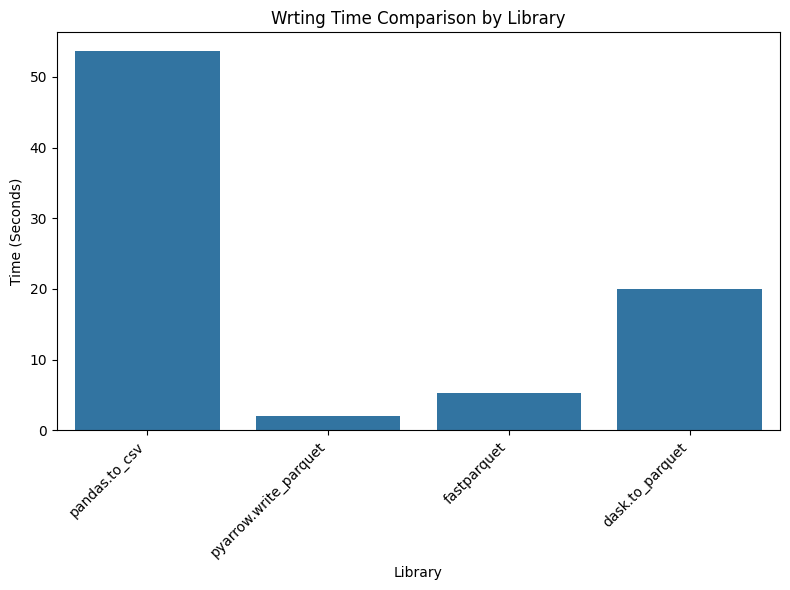

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of reading times
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Time_Seconds', data=writing_times)
plt.title('Wrting Time Comparison by Library')
plt.xlabel('Library')
plt.ylabel('Time (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary and Conclusion

Efficient big data handling in Python requires optimized libraries and HPC strategies. pandas, pyarrow, fastparquet, and dask offer robust solutions for importing and exporting large datasets. Parquet files, with their compression and columnar storage, significantly reduce disk space compared to CSV, while dask enables scalable processing on HPC clusters. By leveraging these tools, data scientists can achieve high-performance, scalable workflows for big data analysis.

##  Resources

1. **_High Performance Python_** (O’Reilly) – Optimization, parallelism, HPC.  
2. **Real Python** – Tutorials on `pandas`, `dask`, Parquet, and large datasets.  
   → [realpython.com](https://realpython.com)

3. **pandas** – [pandas.pydata.org](https://pandas.pydata.org/docs/)  
   - See *Scaling to large datasets* guide.
4. **PyArrow** – [arrow.apache.org/docs/python](https://arrow.apache.org/docs/python/)  
   - Parquet, Feather, zero-copy, pandas integration.
5. **fastparquet** – [fastparquet.readthedocs.io](https://fastparquet.readthedocs.io)  
   - Lightweight Parquet I/O; integrates with Dask.
6. **Dask** – [docs.dask.org](https://docs.dask.org)  
   - Parallel/distributed computing; scalable DataFrames.
7. **datatable** – [datatable.readthedocs.io](https://datatable.readthedocs.io)  
   - Fast CSV I/O and data manipulation (pandas alternative).
8. **NYC Taxi Data** – Real-world Parquet/CSV dataset for testing.  
   → [nyc.gov/tlc](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)
9. **Kaggle / Towards Data Science** – Tutorials comparing `pandas`, `dask`, `pyarrow`.  
10. **PyData Talks** – Expert talks on scalable Python workflows.  
    → [pydata.org](https://pydata.org)
